<a href="https://colab.research.google.com/github/Anubhav3084/Machine-Learning-Foundations-and-Applications/blob/main/assignment%202/19EC3AI15_MLFA_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

%matplotlib inline

## **Data loading and preprocessing**

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST(root='data/train/', download=True, train=True, transform=transform)
valset = datasets.MNIST(root='data/val', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


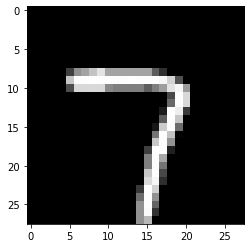

In [5]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray');

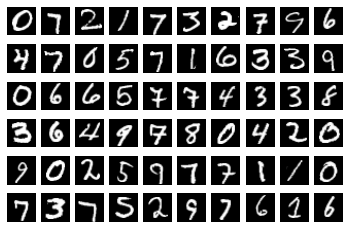

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')

In [7]:
input_size = 784
hidden_size = 10
output_size = 10

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## **Model**
* 1st model is having `activation=sigmoid`
* 2nd model is having `activation=relu`

In [9]:
# Sigmoid activation everywhere
model_Sigmoid = nn.Sequential(
    nn.Linear(input_size, hidden_size),  # hidden layer 1
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 2
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 3
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 4
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 5
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 6
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 7
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 8
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 9
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, hidden_size),    # 10
    nn.BatchNorm1d(hidden_size),
    nn.Sigmoid(),

    nn.Linear(hidden_size, output_size),    # output layer
    nn.Softmax(dim=1)
)

print(device)
model_Sigmoid.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Sigmoid()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Sigmoid()
  (9): Linear(in_features=10, out_features=10, bias=True)
  (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Sigmoid()
  (12): Linear(in_features=10, out_features=10, bias=True)
  (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Sigmoid()
  (15): Linear(in_features=10, out_features=10, bias=True)
  (16): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (17): Sigmoid()
  (18):

In [10]:
# RelU activation everywhere except last layer
model_ReLU = nn.Sequential(
    nn.Linear(input_size, hidden_size),  # hidden layer 1
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 2
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 3
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 4
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 5
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 6
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 7
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 8
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 9
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),    # 10
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, output_size),    # output layer
    nn.Softmax(dim=1)
)

print(device)
model_ReLU.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=10, out_features=10, bias=True)
  (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=10, out_features=10, bias=True)
  (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Linear(in_features=10, out_features=10, bias=True)
  (13): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): Linear(in_features=10, out_features=10, bias=True)
  (16): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (17): ReLU()
  (18): Linear(in_feature

## **Training the models**
* **fit :** function is used for training the network
* **evaluate :** function evaluates the model

In [11]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

probs_Sigmoid = model_Sigmoid(images.cuda())
probs_ReLU = model_ReLU(images.cuda())

loss_Sigmoid = criterion(probs_Sigmoid, labels.cuda())
loss_ReLU = criterion(probs_ReLU, labels.cuda())
print(loss_Sigmoid, loss_ReLU)

tensor(2.2988, device='cuda:0', grad_fn=<NllLossBackward0>) tensor(2.3074, device='cuda:0', grad_fn=<NllLossBackward0>)


In [12]:
def fit(model, optimizer, epochs, trainloader, criterion=nn.CrossEntropyLoss()):
    time0 = time()
    losses = []

    for epoch in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # flatten images
            images = images.view(images.shape[0], -1)

            # reset the gradients
            optimizer.zero_grad()

            # calculate loss
            outputs = model(images.cuda())
            loss = criterion(outputs, labels.cuda())

            # calculate gradient ans backpropagation
            loss.backward()

            # update the parameters
            optimizer.step()

            running_loss += loss.item()
        losses.append(running_loss/len(trainloader))
        print(f"Epoch: {epoch}, training loss: {running_loss/len(trainloader)}")
    print(f"Time taken for the training in minutes: {(time()-time0) / 60}")
    return losses

In [13]:
# training for model with only sigmoid activation
opt_sigmoid = optim.Adam(model_Sigmoid.parameters(), lr=0.0001)
opt_relu = optim.Adam(model_ReLU.parameters(), lr=0.0001)

print("Training model_ReLU")

losses_relu = fit(
    model = model_ReLU, 
    optimizer = opt_relu, 
    epochs = 50, 
    trainloader = trainloader, 
    criterion = nn.CrossEntropyLoss()
    )

print("---------->> Training over <<----------")
print()
print("Training model_Sigmoid")

losses_sigmoid = fit(
    model = model_Sigmoid, 
    optimizer = opt_sigmoid, 
    epochs = 50, 
    trainloader = trainloader, 
    criterion = nn.CrossEntropyLoss()
    )

print("---------->> Training over <<----------")

Training model_ReLU
Epoch: 0, training loss: 2.2270925233104846
Epoch: 1, training loss: 2.1181228115106188
Epoch: 2, training loss: 2.088735900708099
Epoch: 3, training loss: 2.060935757815965
Epoch: 4, training loss: 2.0094042851218283
Epoch: 5, training loss: 1.9918178938853461
Epoch: 6, training loss: 1.946865489615052
Epoch: 7, training loss: 1.8857175794237457
Epoch: 8, training loss: 1.860909411647935
Epoch: 9, training loss: 1.8502402536904634
Epoch: 10, training loss: 1.843914600450601
Epoch: 11, training loss: 1.838368584606439
Epoch: 12, training loss: 1.832448794516419
Epoch: 13, training loss: 1.8280520489983467
Epoch: 14, training loss: 1.824195813014309
Epoch: 15, training loss: 1.8203434364627928
Epoch: 16, training loss: 1.8172473423262394
Epoch: 17, training loss: 1.815293507789498
Epoch: 18, training loss: 1.8125353136550644
Epoch: 19, training loss: 1.8073710602229591
Epoch: 20, training loss: 1.8076393109903153
Epoch: 21, training loss: 1.8038024348236605
Epoch: 22

In [14]:
def evaluate(model, valloader):
    correct_count, all_count = 0, 0
    for images, labels in valloader:
        for i in range(len(labels)):
            
            img = images[i].view(1, 784)
            
            model.eval()
            # turn off gradients to speed up this part
            with torch.no_grad():
                probs = model(img.cuda())
                #print(probs)
            
            probab = list(probs.cpu().numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]

            if true_label == pred_label:
                correct_count += 1
            all_count += 1

    print("Number Of Images Tested =", all_count)
    print("\nModel Accuracy =", (correct_count/all_count))

## **Evaluating model**

In [15]:
print("Evaluating model_ReLU")
evaluate(model_ReLU, valloader)
print("----------------------------------")
print("Evaluating model_Sigmoid")
evaluate(model_Sigmoid, valloader)
print("----------------------------------")

Evaluating model_ReLU
Number Of Images Tested = 10000

Model Accuracy = 0.9201
----------------------------------
Evaluating model_Sigmoid
Number Of Images Tested = 10000

Model Accuracy = 0.9291
----------------------------------


## **Plotting losses v/s Epoch**

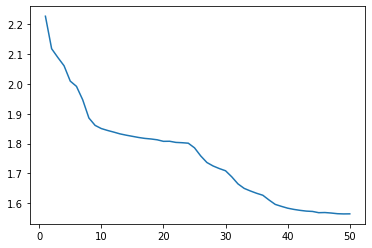

In [20]:
epochs = [i+1 for i in range(50)]
plt.plot(epochs, losses_relu)
plt.show()

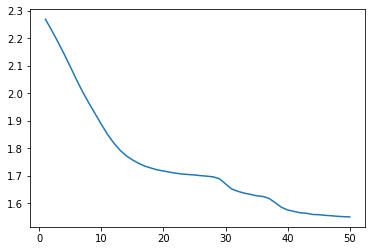

In [21]:
plt.plot(epochs, losses_sigmoid)
plt.show()

## **Save Model Parameters**

In [22]:
torch.save(model_ReLU.state_dict(), 'ReLU_model.pth')
torch.save(model_Sigmoid.state_dict(), 'Sigmoid_model.pth')